## Assignment 1 
### Sanchi Verma a1872694

### 1. Reading datasets

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
# reading train data
with open("reviews_train.txt", "r") as file_handle:
    train = pd.DataFrame(file_handle.readlines())
    
#reading test data
with open("reviews_test.txt", "r") as file_handle:
    test = pd.DataFrame(file_handle.readlines())
    
  

In [2]:
print(train.head(10))

                                                   0
0  __label__1 Almost Completely Useless: It is im...
1  __label__1 Not enough forskolin: Ordered this ...
2  __label__1 Item not received: The item was nev...
3  __label__2 Great episode: If you only watch a ...
4  __label__2 ALL TIME FAVORTITE BOOK!! MUST READ...
5  __label__2 Wonderful: The Sharp VCA4213U 4Head...
6  __label__1 The show and music are wonderful, b...
7  __label__1 Dated beyond readability: I tried t...
8  __label__2 a beautiful doll: I have bought thi...
9  __label__1 a bit too small but fits on my aver...


In [3]:
print(test.head(10))

                                                   0
0  __label__2 For peace of mind when it comes to ...
1  __label__1 The Little Book of Poker: I was dis...
2  __label__2 Cat Sculpture: Great product. It wa...
3  __label__1 overblown visual affects, not an ho...
4  __label__2 Fun Ring, Not Perfect: There's noth...
5  __label__1 Few Pages, Few Challenges: These ma...
6  __label__2 Good memory: Has good memory storag...
7  __label__2 Coffeemaker: Cuisinart coffeemaker ...
8  __label__2 Advanced Peak Oil: Don't read this ...
9  __label__1 ""father"" riker: interesting. bett...


### 2. Pre-processing

In [4]:
def data_Cleaning(data): 
    data_list = data[0]
    #seperating the labels from the text
    data_df = pd.DataFrame([{"Sentiment":values[:10], "Text":values[10:]} for values in data_list])
    #replacing label1 with negative (0) and label2 with positive (1)
    data_df['Sentiment'] = data_df['Sentiment'].replace({'__label__1': 0, '__label__2': 1})
    return data_df
    
train_df = data_Cleaning(train)
test_df = data_Cleaning(test)



In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import re


def prep_version1(version):
    
    stop_words = set(stopwords.words('english'))
    #removing stop words
    version['Text'] = version['Text'].apply(lambda s: " ".join([x for x in s.split(" ") if x.lower() not in stop_words]))
    
    #removing punctuations
    version["Text"] = version["Text"].str.translate(str.maketrans('', '', string.punctuation))

    #removing non-alphanumeric characters
    version["Text"] = version["Text"].apply(lambda x: re.sub(r'\W+', ' ', x))
    
    return version
    
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# task 1 : Version 1 for both datasets
version1_train = prep_version1(train_df)
version1_test = prep_version1(test_df)

In [7]:
print(version1_train.head(10))
print(version1_test.head(10))

   Sentiment                                               Text
0          0   Almost Completely Useless impossible keep Eth...
1          0   enough forskolin Ordered reading guarantee 38...
2          0   Item received item never received 3 emails he...
3          1   Great episode watch handful Next Gen episodes...
4          1   TIME FAVORTITE BOOK MUST READ BEST book ever ...
5          1   Wonderful Sharp VCA4213U 4Head VCR wonderfull...
6          0   show music wonderful but show music wonderful...
7          0   Dated beyond readability tried stick book pic...
8          1   beautiful doll bought doll beautifulI like Tr...
9          0   bit small fits average head bit small frumpy ...
   Sentiment                                               Text
0          1   peace mind comes pets second style window dec...
1          0   Little Book Poker disappointed book believe g...
2          1   Cat Sculpture Great product wifes birthday tw...
3          0   overblown visual affects 

In [8]:
def prep_version2(version):
    # lowercasing of words on version1 
    version1 = pd.DataFrame()
    version1['Sentiment'] = version.Sentiment
    version1["Text"] = version["Text"].str.lower()
    return version1

In [9]:
# task 2: Version 2 for both datasets from version 1
version2_train = prep_version2(version1_train)
version2_test = prep_version2(version1_test)

In [10]:
print(version2_train.head(10))
print(version2_test.head(10))

   Sentiment                                               Text
0          0   almost completely useless impossible keep eth...
1          0   enough forskolin ordered reading guarantee 38...
2          0   item received item never received 3 emails he...
3          1   great episode watch handful next gen episodes...
4          1   time favortite book must read best book ever ...
5          1   wonderful sharp vca4213u 4head vcr wonderfull...
6          0   show music wonderful but show music wonderful...
7          0   dated beyond readability tried stick book pic...
8          1   beautiful doll bought doll beautifuli like tr...
9          0   bit small fits average head bit small frumpy ...
   Sentiment                                               Text
0          1   peace mind comes pets second style window dec...
1          0   little book poker disappointed book believe g...
2          1   cat sculpture great product wifes birthday tw...
3          0   overblown visual affects 

In [11]:
# Lemmatization: Lemmatization is the process of reducing a word to its base form, known as its lemma. 
# It is similar to stemming but it is more accurate as it uses a dictionary-based approach to get the root word.

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_words)

def prep_version3(version):
    version3 = pd.DataFrame()
    version3['Sentiment'] = version.Sentiment
    version3['Text'] = version['Text'].apply(lemmatize_text)
    return version3
    


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sanch\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [12]:
# task 2c: Version 3 for both datasets from version 2
version3_train = prep_version3(version2_train)   
version3_test = prep_version3(version2_test)

In [13]:
print(version3_train.head(10))
print(version3_test.head(10))

   Sentiment                                               Text
0          0  almost completely useless impossible keep ethe...
1          0  enough forskolin ordered reading guarantee 385...
2          0  item received item never received 3 email hear...
3          1  great episode watch handful next gen episode b...
4          1  time favortite book must read best book ever r...
5          1  wonderful sharp vca4213u 4head vcr wonderfully...
6          0  show music wonderful but show music wonderful ...
7          0  dated beyond readability tried stick book pick...
8          1  beautiful doll bought doll beautifuli like tri...
9          0  bit small fit average head bit small frumpy lo...
   Sentiment                                               Text
0          1  peace mind come pet second style window decal ...
1          0  little book poker disappointed book believe gr...
2          1  cat sculpture great product wife birthday two ...
3          0  overblown visual affect ho

### 3. Dataset analysis

In [14]:

import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

def data_analysis(version):
    # Count the number of positive and negative sentiments
    sentiment_count = version['Sentiment'].value_counts()
    positive_count = sentiment_count[1]
    negative_count = sentiment_count[0]

    # Calculate the proportion of positive and negative sentiments
    total_count = len(version)
    positive_proportion = positive_count / total_count
    negative_proportion = negative_count / total_count

    # Print the results
    print(f"Proportion of positive sentiments: {positive_proportion:.2%}")
    print(f"Proportion of negative sentiments: {negative_proportion:.2%}")

    # Combine all text into one string
    all_text = ' '.join(version['Text'])

    # Split the text into individual words
    words = all_text.split()

    # Count the number of unique words
    word_counts = Counter(words)
    num_unique_words = len(word_counts)

    # Create a bar chart of the sentiment counts
    sentiment_count.plot(kind = 'bar')
    plt.title('Proportion of positive and negative sentiments')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    # Create a word cloud of the most common words
    wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', max_words = 50).generate_from_frequencies(word_counts)
    plt.figure(figsize = (8,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Word Cloud')
    plt.show()
    
    return num_unique_words
    



Proportion of positive sentiments: 49.90%
Proportion of negative sentiments: 50.10%


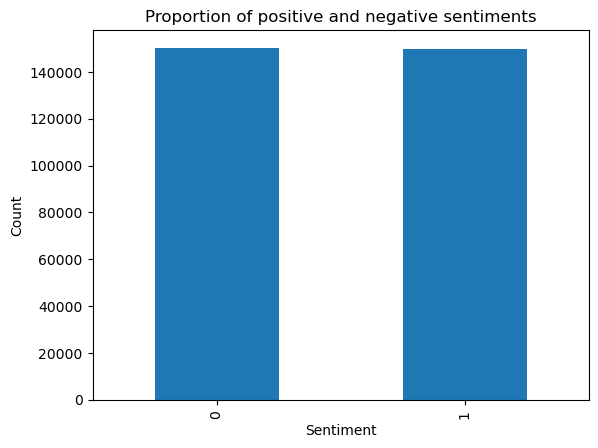

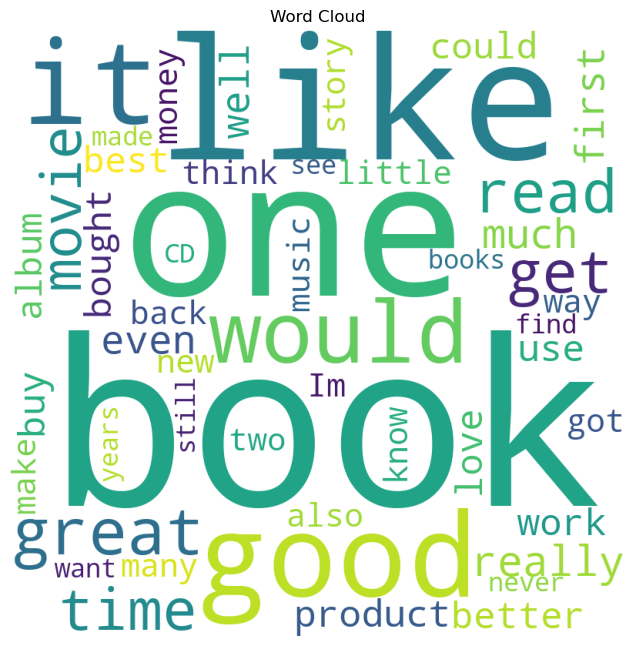

In [15]:
unique_words1 = data_analysis(version1_train)

Proportion of positive sentiments: 49.90%
Proportion of negative sentiments: 50.10%


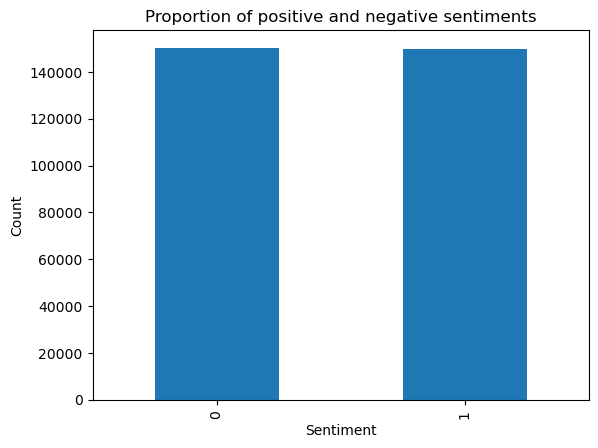

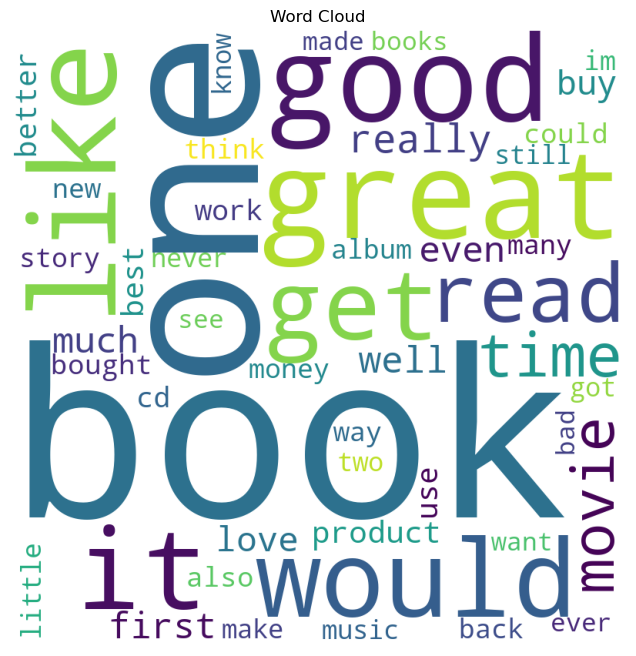

In [16]:
unique_words2 = data_analysis(version2_train)

Proportion of positive sentiments: 49.90%
Proportion of negative sentiments: 50.10%


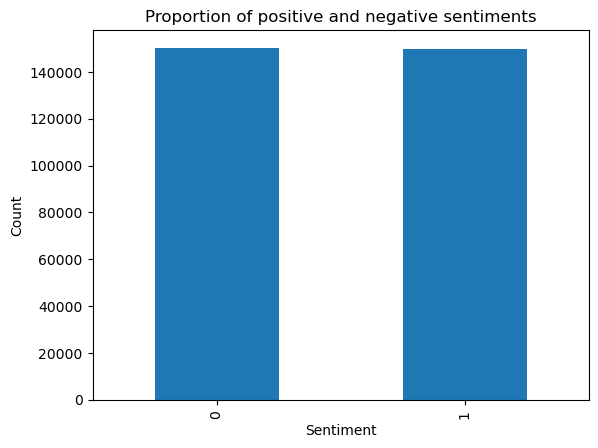

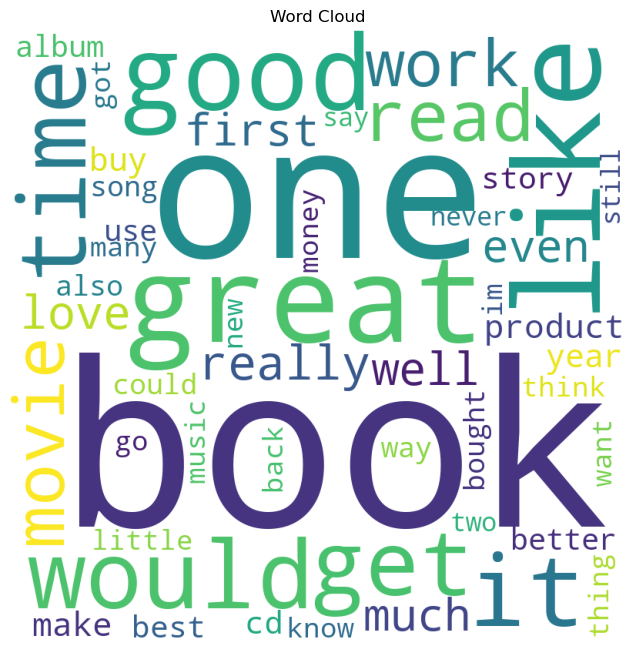

In [17]:
unique_words3 = data_analysis(version3_train)

In [18]:
print("Number of unique words in version 1: ", unique_words1)
print("Number of unique words in version 2: ", unique_words2)
print("Number of unique words in version 3: ", unique_words3)

Number of unique words in version 1:  489595
Number of unique words in version 2:  402154
Number of unique words in version 3:  387684


### Discussion

There are differences in the number of unique words across all three versions, and this is also reflected in the most frequent words displayed in the word cloud.
However, the proportion of negative and positive sentiments in all three versions remains the same since the pre-processing is only applied to the text data and not the labels.

from version 1 to version 2 unique number of words reduce as in version1 capital and small words word counted as different words. In version2 since all words are converted to lower case the number of unique word count reduces.

#### selection of classification model

When the number of unique words is low, algorithms such as Naive Bayes or logistic regression may be suitable since they perform well with low-dimensional data. These algorithms can efficiently capture linear relationships between features, and can work well with limited training data.


### 4. Sentiment classification using Machine Learning

4.1 Sentiment classification using Multinomial Naive bayes

In [19]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


# Sentiment classification using Multinomial Naive bayes
def classification1(train, test):
    
    # split the dataset into training and test sets
    train_data = train["Text"]
    train_target = train["Sentiment"]
    test_data = test["Text"]
    test_target = test["Sentiment"]

    # vectorize the text data using TF-IDF
    vectorizer = TfidfVectorizer()
    train_vectors = vectorizer.fit_transform(train_data)
    test_vectors = vectorizer.transform(test_data)

    # train a MNaive Bayes classifier
    clf = MultinomialNB()
    clf.fit(train_vectors, train_target)

    # make predictions on the test set
    predictions = clf.predict(test_vectors)

    # evaluate the accuracy of the classifier
    accuracy = accuracy_score(test_target, predictions)

    # Calculate the evaluation metrics
    precision = precision_score(test_target, predictions)
    recall = recall_score(test_target, predictions)
    f1 = f1_score(test_target, predictions)
    print("Precision:", precision)
    print("Accuracy: ", accuracy)
    print("Recall:", recall)
    print("F1-Score:", f1)

First off, according to the study above, there are around 50% each of good and negative emotion. As a result, since the dataset has balanced classes, accuracy can be used as a legitimate classification statistic. If the dataset was unbalanced, we couldn't use accuracy right away and would need to make other arrangements.

In [20]:
# applying machine learning classification on all 3 versions
print('Model metrics version 1')
# version 1
classification1(version1_train, version1_test)
# version 2
print('\nModel metrics version 2')
classification1(version2_train, version2_test)

# version 3
print('\nModel metrics version 3')
classification1(version3_train, version3_test)

Model metrics version 1
Precision: 0.8599741849523255
Accuracy:  0.8428
Recall: 0.8211999522881794
F1-Score: 0.8401399284087212

Model metrics version 2
Precision: 0.8599741849523255
Accuracy:  0.8428
Recall: 0.8211999522881794
F1-Score: 0.8401399284087212

Model metrics version 3
Precision: 0.8589738246082027
Accuracy:  0.84148
Recall: 0.8193908790902946
F1-Score: 0.8387155851291129


In [21]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV



def classification2(train,test):
    
    # split the dataset into training and test sets
    train_data = train["Text"]
    train_target = train["Sentiment"]
    test_data = test["Text"]
    test_target = test["Sentiment"]

    # vectorize the text data using TF-IDF 
    vectorizer = TfidfVectorizer()
    train_vectors = vectorizer.fit_transform(train_data)
    test_vectors = vectorizer.transform(test_data)
    
    # train a SVC classifier
    svc = LinearSVC()
    params_svc = {'C': [0.1, 0.5, 1.0, 2.0, 5.0]}
    grid_search_svc = GridSearchCV(svc, params_svc, cv=5)
    grid_search_svc.fit(train_vectors, train_target)
    
    #model prediction
    y_pred_train = grid_search_svc.predict(train_vectors)
    y_pred_test = grid_search_svc.predict(test_vectors)
    
    # evaluate the accuracy of the classifier
    train_accuracy = accuracy_score(train_target, y_pred_train)
    test_accuracy = accuracy_score(test_target, y_pred_test)
    
    # Calculate the evaluation metrics
    precision = precision_score(test_target, y_pred_test)
    recall = recall_score(test_target, y_pred_test)
    f1 = f1_score(test_target, y_pred_test)
    print("Precision:", precision)
    print("train Accuracy: ", train_accuracy)
    print("test Accuracy: ", test_accuracy)
    print("Recall:", recall)
    print("F1-Score:", f1)

In [22]:
print('Model metrics version 1')
# version 1
classification2(version1_train, version1_test)
# version 2
print('\nModel metrics version 2')
classification2(version2_train, version2_test)
# version 3
print('\nModel metrics version 3')
classification2(version3_train, version3_test)

Model metrics version 1
Precision: 0.8929969551979121
train Accuracy:  0.9169966666666667
test Accuracy:  0.89452
Recall: 0.8978967039083933
F1-Score: 0.8954401268834259

Model metrics version 2
Precision: 0.8929969551979121
train Accuracy:  0.9169966666666667
test Accuracy:  0.89452
Recall: 0.8978967039083933
F1-Score: 0.8954401268834259

Model metrics version 3
Precision: 0.8897064641189968
train Accuracy:  0.9132866666666667
test Accuracy:  0.89102
Recall: 0.8941990378116178
F1-Score: 0.8919470939340458


The training accuracy (0.9169966666666667) is higher than the test accuracy (0.89452). This difference between training and test accuracy is relatively small, but it could still indicate overfitting.
In this case, the difference between the training and test accuracy is small, which indicates that the model is not severely overfitting. 

#### discussing point 4 from the assignment

The best dataset and model according to the above results is Version 2 with Linear SVC.  
Lemmatization used in version3 can sometimes result in the loss of information because words are reduced to their base form, which can remove important details that can help in sentiment analysis therefore after preprocessing the data in the version2 we are getting better accuracy. 




### 5. Sentiment classification using VADER sentiment lexicon

In [23]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# analyse with VADER
def classification_vader_model(data):
    pred=[]
    analyzer = SentimentIntensityAnalyzer()
    
    test = lambda x: 1 if x>= 0 else 0
    
    #The test variable is a lambda function that returns 1 
    #if the compound sentiment score (a metric indicating the overall sentiment of the input text)
    #is greater than or equal to 0, and 0 otherwise.
    
    for text in data:
        vs = analyzer.polarity_scores(text)
        pred.append(test(vs['compound']))
        
    #The function finally returns the list pred containing the binary predictions for each input text.
    return pred


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sanch\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
def vader_model_metrics(version_test):
    
    # text for analysis
    text = version_test.Text
    # labels to test
    sentiment = version_test.Sentiment
    # applying the vader model
    pred = classification_vader_model(text)
    # metrics
    accuracy = accuracy_score(sentiment,pred)
    precision = precision_score(sentiment, pred)
    recall = recall_score(sentiment, pred)
    f1 = f1_score(sentiment, pred)
    
    print("Accuracy: ", accuracy)
    print("Precision:", precision)
    print("Accuracy: ", accuracy)
    print("Recall:", recall)
    print("F1-Score:", f1)
    

In [25]:
print("Model metrics for version 1")
vader_model_metrics(version1_test)

print("\nModel metrics for version 2")
vader_model_metrics(version2_test)

print("\nModel metrics for version 3")
vader_model_metrics(version3_test)

Model metrics for version 1
Accuracy:  0.67262
Precision: 0.613983853801625
Accuracy:  0.67262
Recall: 0.9404198640213113
F1-Score: 0.7429248987027671

Model metrics for version 2
Accuracy:  0.67261
Precision: 0.613961093735806
Accuracy:  0.67261
Recall: 0.9405192636475687
F1-Score: 0.7429392504652204

Model metrics for version 3
Accuracy:  0.67218
Precision: 0.6134626842473383
Accuracy:  0.67218
Recall: 0.9415728996858972
F1-Score: 0.7429024061235373


The VADER lexicon has a limited vocabulary that includes around 7500 words and phrases. Therefore, it may not be able to accurately identify the sentiment of texts that contain words that are not present in the lexicon due to which is it less accurate than the previous two models i.e Multinomial Naive Bayes and LinearSVC.

With reference to the code:
Everything that is >=0 has been given a positive rating by us, although VADER also takes into account remarks that are neutral. Hence, if we can determine the appropriate threshold for discriminating between positive and negative evaluations, whose threshold has been set to 0 for the purposes of this assignment, VADER can perform significantly better.

### 6. (optional challenge 3 points) Combine VADER with the classifier

In [26]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import BernoulliNB

def classification3(train,test):
    analyser = SentimentIntensityAnalyzer()

    train_features = [list(analyser.polarity_scores(i).values()) for i in train['Text']]
    test_features = [list(analyser.polarity_scores(i).values()) for i in test['Text']]
    
    from sklearn.preprocessing import StandardScaler

    # Instantiate the StandardScaler
    scaler = StandardScaler()

    # Fit and transform the training data
    train_features = scaler.fit_transform(train_features)

    # Transform the test data using the fitted scaler
    test_features = scaler.transform(test_features)

    clf = BernoulliNB()
    clf.fit(train_features, train_df["Sentiment"])

    
    y_pred = clf.predict(test_features)
    # metrics
    accuracy = accuracy_score(test["Sentiment"],y_pred)
    precision = precision_score(test["Sentiment"], y_pred)
    recall = recall_score(test["Sentiment"], y_pred)
    f1 = f1_score(test["Sentiment"], y_pred)
    
    print("Accuracy: ", accuracy)
    print("Precision:", precision)
    print("Accuracy: ", accuracy)
    print("Recall:", recall)
    print("F1-Score:", f1)



In [27]:
print("Model metrics for version 1")
classification3(version1_train,version1_test)

print("\nModel metrics for version 2")
classification3(version1_train,version1_test)

print("\nModel metrics for version 3")
classification3(version1_train,version1_test)

Model metrics for version 1
Accuracy:  0.7396
Precision: 0.7019006723919845
Accuracy:  0.7396
Recall: 0.8383960876307105
F1-Score: 0.7641005199934773

Model metrics for version 2
Accuracy:  0.7396
Precision: 0.7019006723919845
Accuracy:  0.7396
Recall: 0.8383960876307105
F1-Score: 0.7641005199934773

Model metrics for version 3
Accuracy:  0.7396
Precision: 0.7019006723919845
Accuracy:  0.7396
Recall: 0.8383960876307105
F1-Score: 0.7641005199934773


The VADER lexicon has a limited vocabulary that includes around 7500 words and phrases, while BernoulliNB requires a much larger vocabulary of unique words to work effectively. Therefore, there may be a vocabulary mismatch that lead to average performance of the model.
In order to use BernoulliNB, the text data needs to be transformed into a set of numerical features that can be used as inputs to the algorithm. This process involves feature engineering, which can be challenging when working with sentiment analysis because it requires identifying the most relevant features that can accurately capture the sentiment of the text. 

### 7. References


1. An Introduction to Machine Learning https://link.springer.com/book/10.1007/978-3-030-15729-6
2. Module 2 from the course content https://myuni.adelaide.edu.au/courses/86392/pages/welcome-to-module-2-text-classification